# GANs

## Neuroworkshop

by [Dmitri Soshnikov](http://fb.com/shwars)

## Genereative Adversarial Networks - Генеративно-состязательные сети

Цель генеративно-состязательных сетей - научиться генерировать изображения, похожие на обучающие примеры, но не повторяющие их полностью.

Основная идея GANs: сеть состоит из двух частей:

 * **Генератор** - сеть, которая генерирует изображения, которые должны быть неотличимы от оригинала
 * **Дискриминатор** - сеть, которая учится отличать искусственные изображения от естественных (из обучающей выборки)

In [1]:
import keras
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

Using TensorFlow backend.


Описываем генератор: его задача - по входному вектору размерности 100 сгенерировать правдоподобное изображение.

In [0]:
generator = Sequential()
generator.add(Dense(256, input_shape=(100,)))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(1024))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784, activation='tanh'))
generator.add(Reshape((28,28)))

optimizer = keras.optimizers.Adam(lr=0.0002, decay=8e-9)

generator.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])


Дискриминатор принимает на вход изображение и определяет, является ли оно настоящим или "поддельным"

In [0]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=(28,28)))
discriminator.add(Dense(784))

discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(784//2))
discriminator.add(LeakyReLU(alpha=0.2))

discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

Основная генеративно-состязательная модель - это сеть, которая последовательно применяет генератор и дискриминатор.

In [0]:
discriminator.trainable = False
adversarial = Sequential()
adversarial.add(generator)
adversarial.add(discriminator)
adversarial.compile(loss='binary_crossentropy', optimizer=optimizer)

In [0]:
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

Обучение производится следующим образом:
 * Обучаем дискриминатор - для этого передаём ему на вход последовательность из 50% реальных и 50% искусственных изображений (и соответствующие labels)
 * Обучаем генератор (неявно через обучение генеративно-состязательной модели с замороженными весами дискриминатора) на искусственных данных

In [0]:
def plotn(n):
  noise = np.random.normal(0, 1, (n,100))
  imgs = generator.predict(noise)
  fig,ax = plt.subplots(1,n)
  for i,im in enumerate(imgs):
    ax[i].imshow(im.reshape(28,28))
  plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch: 0, [Discriminator :: d_loss: 0.627160], [ Generator :: loss: 0.514149]


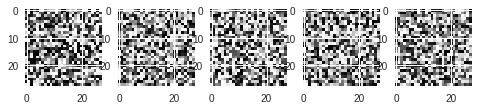

epoch: 500, [Discriminator :: d_loss: 0.081223], [ Generator :: loss: 6.134189]


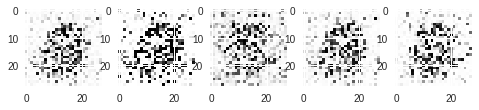

epoch: 1000, [Discriminator :: d_loss: 0.193338], [ Generator :: loss: 4.851089]


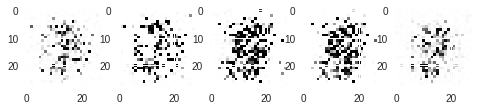

epoch: 1500, [Discriminator :: d_loss: 0.327546], [ Generator :: loss: 2.079714]


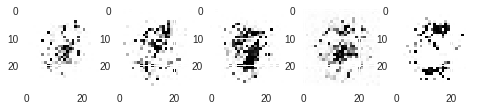

epoch: 2000, [Discriminator :: d_loss: 0.279438], [ Generator :: loss: 2.442273]


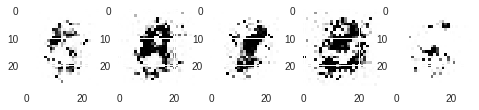

epoch: 2500, [Discriminator :: d_loss: 0.465123], [ Generator :: loss: 1.853260]


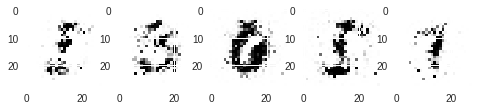

epoch: 3000, [Discriminator :: d_loss: 0.672475], [ Generator :: loss: 1.405100]


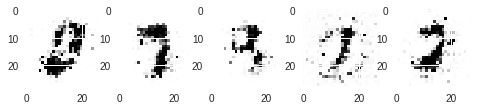

epoch: 3500, [Discriminator :: d_loss: 0.696433], [ Generator :: loss: 1.412430]


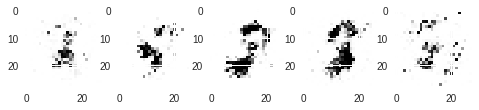

epoch: 4000, [Discriminator :: d_loss: 0.617492], [ Generator :: loss: 1.214739]


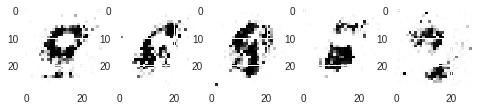

epoch: 4500, [Discriminator :: d_loss: 0.632841], [ Generator :: loss: 0.857288]


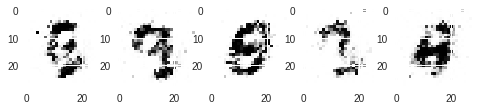

epoch: 5000, [Discriminator :: d_loss: 0.479267], [ Generator :: loss: 0.929725]


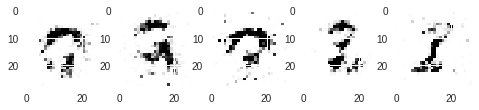

epoch: 5500, [Discriminator :: d_loss: 0.416465], [ Generator :: loss: 1.112510]


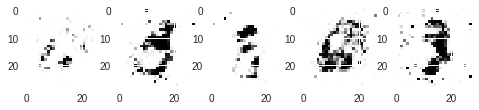

epoch: 6000, [Discriminator :: d_loss: 0.457704], [ Generator :: loss: 0.752128]


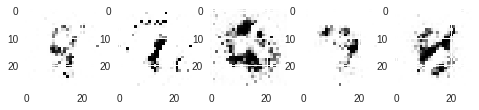

epoch: 6500, [Discriminator :: d_loss: 0.444978], [ Generator :: loss: 1.566382]


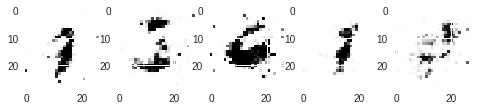

epoch: 7000, [Discriminator :: d_loss: 0.430372], [ Generator :: loss: 1.389698]


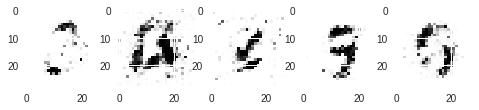

epoch: 7500, [Discriminator :: d_loss: 0.430644], [ Generator :: loss: 1.355777]


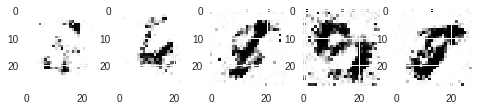

epoch: 8000, [Discriminator :: d_loss: 0.695498], [ Generator :: loss: 1.270674]


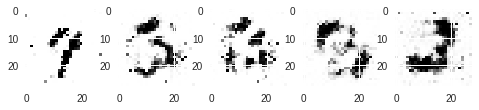

epoch: 8500, [Discriminator :: d_loss: 0.365174], [ Generator :: loss: 2.681050]


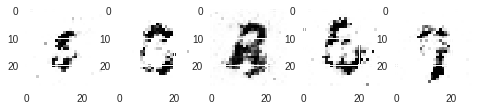

epoch: 9000, [Discriminator :: d_loss: 0.550843], [ Generator :: loss: 0.657292]


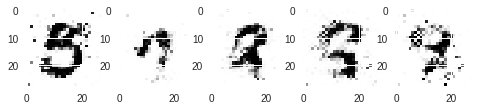

epoch: 9500, [Discriminator :: d_loss: 0.563007], [ Generator :: loss: 1.694004]


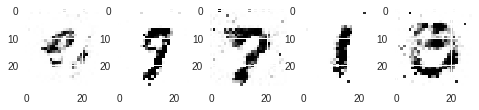

epoch: 10000, [Discriminator :: d_loss: 0.564705], [ Generator :: loss: 1.254259]


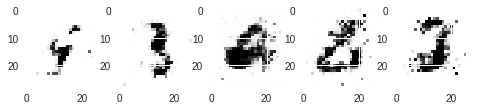

epoch: 10500, [Discriminator :: d_loss: 0.536046], [ Generator :: loss: 1.226345]


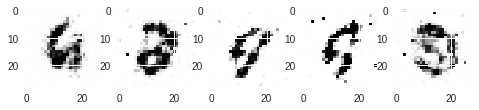

epoch: 11000, [Discriminator :: d_loss: 0.544534], [ Generator :: loss: 0.901517]


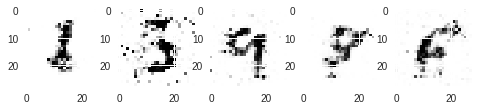

epoch: 11500, [Discriminator :: d_loss: 0.470080], [ Generator :: loss: 2.149642]


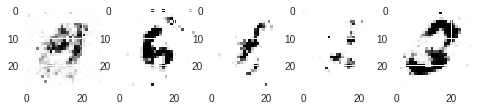

epoch: 12000, [Discriminator :: d_loss: 0.422144], [ Generator :: loss: 2.232343]


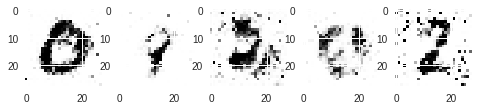

epoch: 12500, [Discriminator :: d_loss: 0.520498], [ Generator :: loss: 1.504804]


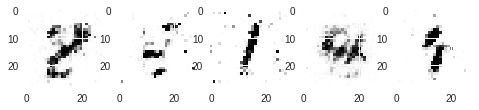

epoch: 13000, [Discriminator :: d_loss: 0.487071], [ Generator :: loss: 1.466314]


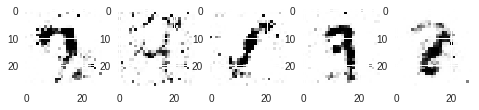

epoch: 13500, [Discriminator :: d_loss: 0.496782], [ Generator :: loss: 1.374868]


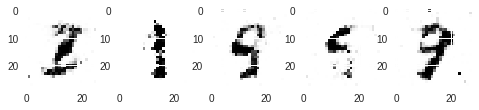

epoch: 14000, [Discriminator :: d_loss: 0.590944], [ Generator :: loss: 1.637693]


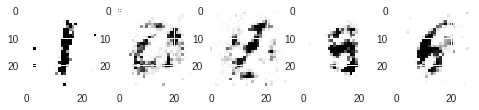

epoch: 14500, [Discriminator :: d_loss: 0.531683], [ Generator :: loss: 0.852325]


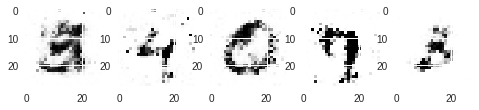

epoch: 15000, [Discriminator :: d_loss: 0.608791], [ Generator :: loss: 0.828425]


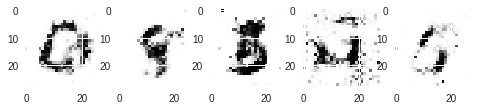

epoch: 15500, [Discriminator :: d_loss: 0.640489], [ Generator :: loss: 0.984584]


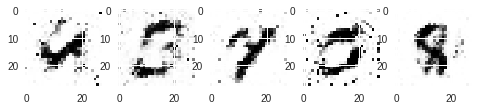

epoch: 16000, [Discriminator :: d_loss: 0.681771], [ Generator :: loss: 0.892199]


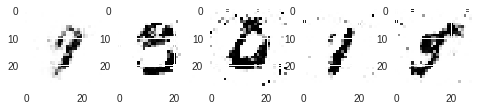

epoch: 16500, [Discriminator :: d_loss: 0.448575], [ Generator :: loss: 1.048977]


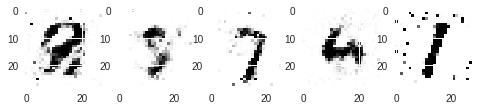

epoch: 17000, [Discriminator :: d_loss: 0.383634], [ Generator :: loss: 0.905317]


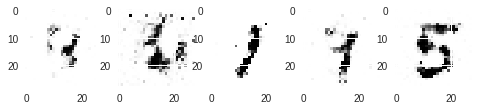

epoch: 17500, [Discriminator :: d_loss: 0.502126], [ Generator :: loss: 1.191002]


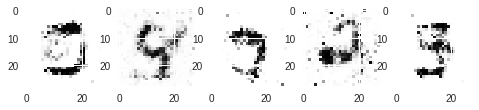

epoch: 18000, [Discriminator :: d_loss: 0.319116], [ Generator :: loss: 1.157945]


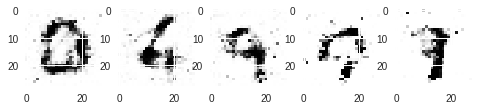

epoch: 18500, [Discriminator :: d_loss: 0.769595], [ Generator :: loss: 1.352644]


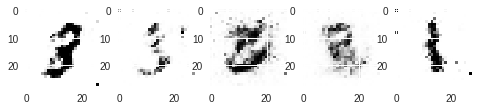

epoch: 19000, [Discriminator :: d_loss: 0.758907], [ Generator :: loss: 0.600345]


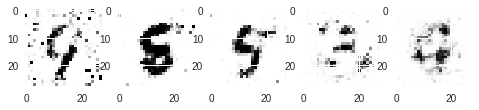

epoch: 19500, [Discriminator :: d_loss: 0.628832], [ Generator :: loss: 1.526005]


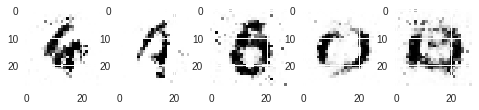

In [8]:
batch=32
for cnt in range(20000):
## train discriminator
  random_index =  np.random.randint(0, len(X_train) - batch//2)
  legit_images = X_train[random_index : random_index + batch//2].reshape(batch//2, 28, 28)
  gen_noise = np.random.normal(0, 1, (batch//2,100))
  syntetic_images = generator.predict(gen_noise)
  x_combined_batch = np.concatenate((legit_images, syntetic_images))
  y_combined_batch = np.concatenate((np.ones((batch//2, 1)), np.zeros((batch//2, 1))))
  d_loss = discriminator.train_on_batch(x_combined_batch, y_combined_batch)
# train generator
  noise = np.random.normal(0, 1, (batch,100))
  y_mislabled = np.ones((batch, 1))
  g_loss = adversarial.train_on_batch(noise, y_mislabled)
  if cnt%500==0:
    print ('epoch: %d, [Discriminator :: d_loss: %f], [ Generator :: loss: %f]' % (cnt, d_loss[0], g_loss))
    plotn(5)

## DCGAN

Deep Convolutional GAN - генератор и дискриминатор делаются свёрточными сетями

In [9]:
generator = Sequential()
generator.add(Dense(128 * 7 * 7, activation="relu", input_dim=100))
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(128, kernel_size=3, padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=3, padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(Conv2D(1, kernel_size=3, padding="same"))
generator.add(Activation("tanh"))

optimizer = keras.optimizers.Adam(0.0002, 0.5)

generator.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 6272)              633472    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 128)       0         
__________

In [0]:
discriminator = Sequential()

discriminator.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
discriminator.add(ZeroPadding2D(padding=((0,1),(0,1))))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=optimizer)

In [0]:
discriminator.trainable = False
adversarial = Sequential()
adversarial.add(generator)
adversarial.add(discriminator)
adversarial.compile(loss='binary_crossentropy', optimizer=optimizer)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch: 0, [Discriminator :: d_loss: 1.073407], [ Generator :: loss: 0.582876]


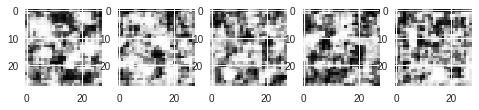

epoch: 50, [Discriminator :: d_loss: 0.623544], [ Generator :: loss: 0.912455]


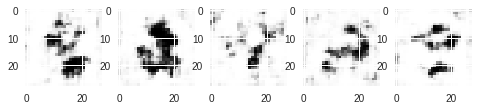

epoch: 100, [Discriminator :: d_loss: 0.746757], [ Generator :: loss: 1.264766]


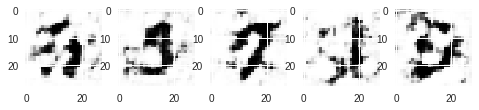

epoch: 150, [Discriminator :: d_loss: 0.847759], [ Generator :: loss: 1.210804]


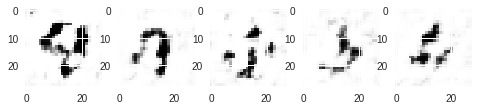

epoch: 200, [Discriminator :: d_loss: 0.802075], [ Generator :: loss: 1.191843]


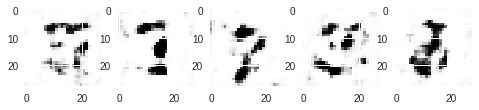

epoch: 250, [Discriminator :: d_loss: 0.873943], [ Generator :: loss: 1.065409]


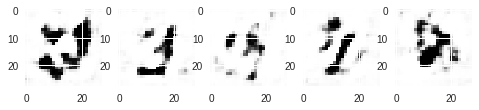

epoch: 300, [Discriminator :: d_loss: 0.818493], [ Generator :: loss: 0.931372]


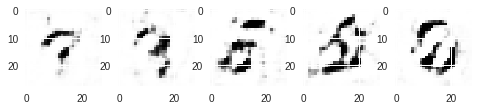

epoch: 350, [Discriminator :: d_loss: 0.825454], [ Generator :: loss: 1.035033]


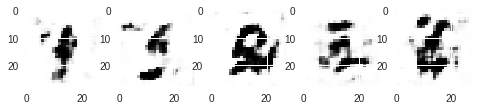

epoch: 400, [Discriminator :: d_loss: 0.711817], [ Generator :: loss: 1.232428]


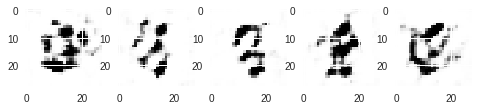

epoch: 450, [Discriminator :: d_loss: 0.935264], [ Generator :: loss: 0.955423]


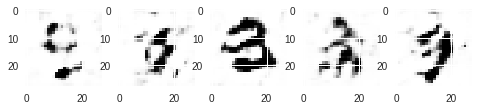

In [12]:
batch=32
y_labeled = np.ones((batch, 1))
y_mislabeled = np.zeros((batch, 1))
for cnt in range(500):
## train discriminator
  random_index =  np.random.randint(0, len(X_train) - batch)
  legit_images = X_train[random_index : random_index + batch].reshape(batch, 28, 28, 1)
  gen_noise = np.random.normal(0, 1, (batch,100))
  syntetic_images = generator.predict(gen_noise)
  d_loss_1 = discriminator.train_on_batch(legit_images, y_labeled)
  d_loss_2 = discriminator.train_on_batch(syntetic_images, y_mislabeled)
  d_loss = 0.5*np.add(d_loss_1,d_loss_2)
# train generator
  g_loss = adversarial.train_on_batch(gen_noise, y_mislabled)
  if cnt%50==0:
    print ('epoch: %d, [Discriminator :: d_loss: %f], [ Generator :: loss: %f]' % (cnt, d_loss, g_loss))
    plotn(5)

## Полезные ссылки 

* [Примеры реализации разных типов GAN на Keras](https://github.com/eriklindernoren/Keras-GAN)